In [7]:
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
import uncertainty_wizard as uwiz
from sklearn.model_selection import train_test_split

Training data:        (56000, 28, 28)
Training solution:    (56000,)
Test data:            (14000, 28, 28)
Test solution:        (14000,)


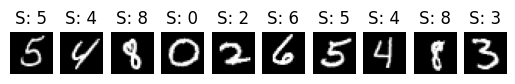

Training data:        (56000, 28, 28, 1)
Training solution:    (56000, 10)
Test data:            (14000, 28, 28, 1)
Test solution:        (14000, 10)


In [8]:
# LOAD
data = pd.read_csv('../mnist.csv')
x_all = data.drop('solution', axis=1).values
y_all = data['solution'].values

# RESHAPE
x_all_fixed = x_all.reshape(-1, 28, 28)

# SPLIT
x_train, x_test, y_train, y_test = train_test_split(x_all_fixed, y_all, test_size=0.2, random_state=42)


print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

fig, axes = plt.subplots(1, 10)
for i in range(10):
    axes[i].imshow(x_train[i], cmap='gray', vmin=0, vmax=255)
    axes[i].set_title(f"S: {y_train[i]}")
    axes[i].axis('off')
plt.show()

x_train = (x_train.astype('float32') / 255).reshape(x_train.shape[0], 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
x_test = (x_test.astype('float32') / 255).reshape(x_test.shape[0], 28, 28, 1)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)      #??????????

print("Training data:       ", x_train.shape)
print("Training solution:   ", y_train.shape)
print("Test data:           ", x_test.shape)
print("Test solution:       ", y_test.shape)

In [9]:

# model = tf.keras.models.load_model('model_settings')

model = uwiz.models.StochasticSequential()

model.add(tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.inner.load_weights('model_weights')


(14000, 28, 28, 1)


2024-02-02 19:03:35.985298: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43904000 exceeds 10% of free system memory.
2024-02-02 19:03:36.485929: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 43904000 exceeds 10% of free system memory.
2024-02-02 19:03:38.859118: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


224/224 [==============================] - 5s 8ms/step


2024-02-02 19:03:40.985814: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 19:03:40.985873: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17825 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)
2024-02-02 19:03:41.079791: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 19:03:41.079855: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17825 MB memory) -> physical PluggableDevice (device: 0, name: 

7/7 [==============================] - 0s 6ms/step


2024-02-02 19:03:41.950547: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-02-02 19:03:41.950608: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 17825 MB memory) -> physical PluggableDevice (device: 0, name: DML, pci bus id: <undefined>)


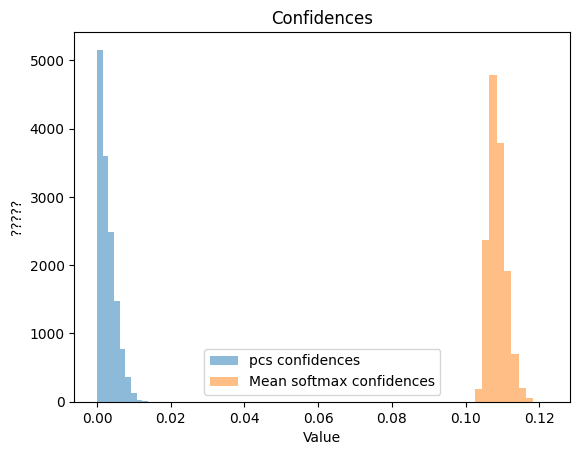

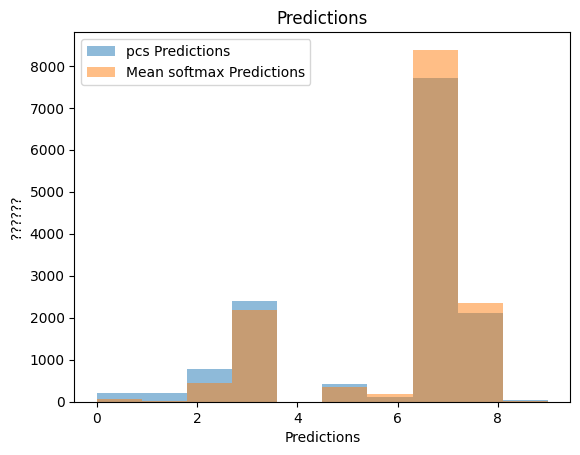

In [10]:
quantifiers = ['pcs', 'mean_softmax']

print(x_test.shape)
results = model.predict_quantified(x_test,
                                   quantifier=quantifiers,
                                   batch_size=2000,
                                   sample_size=32,
                                   verbose=1)

pcs_predictions = results[0][0]
pcs_confidences = results[0][1]
mean_softmax_predictions = results[1][0]
mean_softmax_confidences = results[1][1]

plt.hist(pcs_confidences, alpha=0.5, label='pcs confidences')
plt.hist(mean_softmax_confidences, alpha=0.5, label='Mean softmax confidences')
plt.xlabel('Value')
plt.ylabel('?????')
plt.title('Confidences')
plt.legend()
plt.show()

plt.hist(pcs_predictions, alpha=0.5, label='pcs Predictions')
plt.hist(mean_softmax_predictions, alpha=0.5, label='Mean softmax Predictions')
plt.xlabel('Predictions')
plt.ylabel('??????')
plt.title('Predictions')
plt.legend()
plt.show()

In [11]:
test_results = results[0][0]
with open('Archive.txt', 'w') as file:
    file.write(str(test_results))